In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import torch
from torch import nn

In [2]:
def NORM(img):
    Min = np.min(img)
    Max = np.max(img)
    img = (img-Min)/(Max-Min+1e-10)
    return(img)

In [3]:

def Dice( y_true, y_pred):
    smooth = 1
    iflat = y_pred.contiguous().view(-1)
    tflat = y_true.contiguous().view(-1)
    intersection = (iflat * tflat).sum()

    A_sum = torch.sum(iflat * iflat)
    B_sum = torch.sum(tflat * tflat)

    dice_score = (2. * intersection + smooth) / (A_sum + B_sum + smooth) 
    return dice_score

In [4]:
# path = './Result/'
# img_us =NORM(np.load('./Result/us_us_10_slice10_17.npy'))
# img_mr = NORM(np.load('./Result/mr_us_10_slice10_17.npy'))
# w_mr = NORM(np.load('./Result/warped_mr_img_us_10_slice10_17.npy'))
# w_mr_mask = NORM(np.load('./Result/warped_mask_us_10_slice10_17.npy'))
# df_0=np.load('./Result/df_us_10_slice10_17.npy')
# us_mask = NORM(np.load('./Result/mask_fixed_us_10_slice10_17.npy'))
# mr_mask = NORM(np.load('./Result/mask_moving_us_10_slice10_17.npy'))
# map_moving = NORM(np.load('./Result/map_moving_us_10_slice10_17.npy'))
# map_fixed = NORM(np.load('./Result/map_fixed_us_10_slice10_17.npy'))
# Att_fixed = NORM(np.load('./Result/Att_fixed_us_10_slice10_17.npy'))
# Att_moving = NORM(np.load('./Result/Att_moving_us_10_slice10_17.npy'))

In [5]:
path = './Result/'
img_us =np.load('./Result/us_us_10_slice10_17.npy')
img_mr = np.load('./Result/mr_us_10_slice10_17.npy')
w_mr = np.load('./Result/warped_mr_img_us_10_slice10_17.npy')
w_mr_mask = np.load('./Result/warped_mask_us_10_slice10_17.npy')
df_0=np.load('./Result/df_us_10_slice10_17.npy')
us_mask = np.load('./Result/mask_fixed_us_10_slice10_17.npy')
mr_mask = np.load('./Result/mask_moving_us_10_slice10_17.npy')
map_moving = np.load('./Result/map_moving_us_10_slice10_17.npy')
map_fixed = np.load('./Result/map_fixed_us_10_slice10_17.npy')
Att_fixed = np.load('./Result/Att_fixed_us_10_slice10_17.npy')
Att_moving = np.load('./Result/Att_moving_us_10_slice10_17.npy')

Text(0.5, 1.0, 'warped mask')

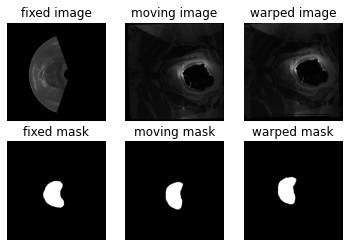

In [6]:
plt.subplot(231)
plt.imshow(img_us,cmap='gray')
plt.axis('off')
plt.title('fixed image')

plt.subplot(232)
plt.imshow(img_mr,cmap='gray')
plt.axis('off')
plt.title('moving image')

plt.subplot(233)
plt.imshow(w_mr,cmap='gray')
plt.axis('off')
plt.title('warped image')

plt.subplot(234)
plt.imshow(us_mask,cmap='gray')
plt.axis('off')
plt.title('fixed mask')

plt.subplot(235)
plt.imshow(mr_mask,cmap='gray')
plt.axis('off')
plt.title('moving mask')

plt.subplot(236)
plt.imshow(w_mr_mask ,cmap='gray')
plt.axis('off')
plt.title('warped mask')

Text(0.5, 1.0, 'Att moving')

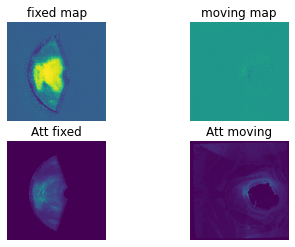

In [7]:
plt.subplot(221)
plt.imshow(map_fixed)
plt.axis('off')
plt.title('fixed map')

plt.subplot(222)
plt.imshow(map_moving)
plt.axis('off')
plt.title('moving map')

plt.subplot(223)
plt.imshow(Att_fixed)
plt.axis('off')
plt.title('Att fixed')

plt.subplot(224)
plt.imshow(Att_moving)
plt.axis('off')
plt.title('Att moving')

In [8]:
print(Att_fixed)

[[-0.6636276 -0.6636276 -0.6636276 ... -0.6636276 -0.6636276 -0.6636276]
 [-0.6636276 -0.6636276 -0.6636276 ... -0.6636276 -0.6636276 -0.6636276]
 [-0.6636276 -0.6636276 -0.6636276 ... -0.6636276 -0.6636276 -0.6636276]
 ...
 [-0.6636276 -0.6636276 -0.6636276 ... -0.6636276 -0.6636276 -0.6636276]
 [-0.6636276 -0.6636276 -0.6636276 ... -0.6636276 -0.6636276 -0.6636276]
 [-0.6636276 -0.6636276 -0.6636276 ... -0.6636276 -0.6636276 -0.6636276]]


In [9]:
print(np.min(Att_fixed))

-0.6636276


In [10]:
print('Dice score before reg: ', Dice(torch.tensor(us_mask),torch.tensor(mr_mask)))
print('Dice score after reg: ', Dice(torch.tensor(us_mask),torch.tensor(w_mr_mask)))

Dice score before reg:  tensor(0.8031)
Dice score after reg:  tensor(0.6720)


In [11]:
print(map_fixed)

[[0.32540137 0.3231636  0.32257694 ... 0.31329638 0.31922883 0.31688747]
 [0.33951464 0.28850275 0.30611813 ... 0.28267103 0.31958425 0.2771457 ]
 [0.32146984 0.3082668  0.30709228 ... 0.2945276  0.2982739  0.3139063 ]
 ...
 [0.3107034  0.3042326  0.33722332 ... 0.28138664 0.32739395 0.28439796]
 [0.31947425 0.30487505 0.313098   ... 0.30734137 0.30276367 0.30954215]
 [0.31356958 0.30082628 0.31148186 ... 0.2884082  0.31857356 0.30337855]]


In [12]:
############### Distance MAP ######################

from scipy import ndimage

a = np.array(([0,1,1,1,1],

              [0,0,1,1,1],

              [0,1,1,1,1],

              [0,1,1,1,0],

              [0,1,1,0,0]))
b = 1-a

d = ndimage.distance_transform_edt(b)
d_n =ndimage.distance_transform_edt(a)

In [13]:
print(d)

[[1.         0.         0.         0.         0.        ]
 [1.41421356 1.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.        ]
 [1.         0.         0.         0.         1.        ]
 [1.         0.         0.         1.         1.41421356]]


In [14]:
print(d_n)

[[0.         1.         1.41421356 2.23606798 3.        ]
 [0.         0.         1.         2.         2.        ]
 [0.         1.         1.41421356 1.41421356 1.        ]
 [0.         1.         1.41421356 1.         0.        ]
 [0.         1.         1.         0.         0.        ]]


In [15]:
Distance_map = d-d_n+1

In [16]:
print(Distance_map)

[[ 2.          0.         -0.41421356 -1.23606798 -2.        ]
 [ 2.41421356  2.          0.         -1.         -1.        ]
 [ 2.          0.         -0.41421356 -0.41421356  0.        ]
 [ 2.          0.         -0.41421356  0.          2.        ]
 [ 2.          0.          0.          2.          2.41421356]]
